In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
## Open, High, Low, Close Data
df = pd.read_csv('/content/crypto_ohlc.csv')
df.head()

,coin_id,symbol,timestamp,date,open,high,low,close
0,bitcoin,btc,1733529600000,2024-12-07,97072.0,102034.0,96589.0,99974.0
1,bitcoin,btc,1733875200000,2024-12-11,99928.0,101235.0,94387.0,96650.0
2,bitcoin,btc,1734220800000,2024-12-15,96643.0,102658.0,95741.0,101367.0
3,bitcoin,btc,1734566400000,2024-12-19,101393.0,108135.0,100237.0,100356.0
4,bitcoin,btc,1734912000000,2024-12-23,100139.0,102759.0,92245.0,95094.0


In [3]:
# Cargamos datos
df = pd.read_csv('/content/crypto_ohlc.csv') # Root (GoogleColab)
df.head()


,coin_id,symbol,timestamp,date,open,high,low,close
0,bitcoin,btc,1733529600000,2024-12-07,97072.0,102034.0,96589.0,99974.0
1,bitcoin,btc,1733875200000,2024-12-11,99928.0,101235.0,94387.0,96650.0
2,bitcoin,btc,1734220800000,2024-12-15,96643.0,102658.0,95741.0,101367.0
3,bitcoin,btc,1734566400000,2024-12-19,101393.0,108135.0,100237.0,100356.0
4,bitcoin,btc,1734912000000,2024-12-23,100139.0,102759.0,92245.0,95094.0


In [4]:
# Convertir timestamp
df['timestamp'] = df['timestamp'].astype(float)
df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')

# Calcular métricas
df['daily_range'] = df['high'] - df['low']
df['daily_change'] = df['close'] - df['open']
df['pct_change'] = ((df['close'] - df['open']) / df['open']) * 100


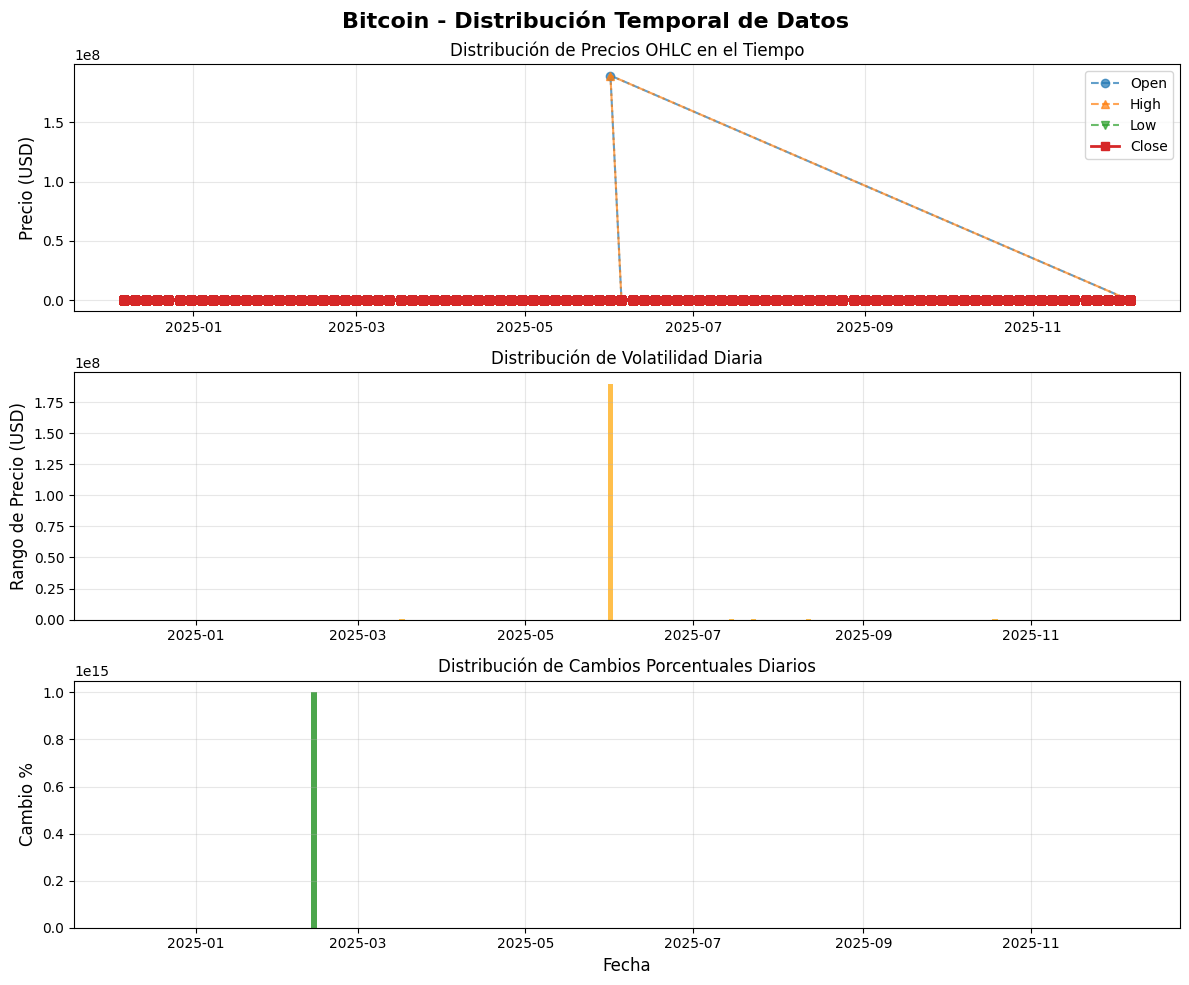

In [5]:
# Crear figura con múltiples subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 10))
fig.suptitle('Bitcoin - Distribución Temporal de Datos', fontsize=16, fontweight='bold')

# Subplot 1: Precios OHLC en el tiempo
axes[0].plot(df['datetime'], df['open'], label='Open', marker='o', linestyle='--', alpha=0.7)
axes[0].plot(df['datetime'], df['high'], label='High', marker='^', linestyle='--', alpha=0.7)
axes[0].plot(df['datetime'], df['low'], label='Low', marker='v', linestyle='--', alpha=0.7)
axes[0].plot(df['datetime'], df['close'], label='Close', marker='s', linewidth=2)
axes[0].set_ylabel('Precio (USD)', fontsize=12)
axes[0].set_title('Distribución de Precios OHLC en el Tiempo')
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

# Subplot 2: Rango diario (volatilidad)
axes[1].bar(df['datetime'], df['daily_range'], color='orange', alpha=0.7, width=2)
axes[1].set_ylabel('Rango de Precio (USD)', fontsize=12)
axes[1].set_title('Distribución de Volatilidad Diaria')
axes[1].grid(True, alpha=0.3)

# Subplot 3: Cambio porcentual diario
colors = ['green' if x > 0 else 'red' for x in df['pct_change']]
axes[2].bar(df['datetime'], df['pct_change'], color=colors, alpha=0.7, width=2)
axes[2].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[2].set_ylabel('Cambio %', fontsize=12)
axes[2].set_xlabel('Fecha', fontsize=12)
axes[2].set_title('Distribución de Cambios Porcentuales Diarios')
axes[2].grid(True, alpha=0.3)

# Ajustar layout
plt.tight_layout()
plt.show()

In [6]:
print('=== Estadísticas de Distribución Temporal ===')
print(f'Período: {df["datetime"].min()} a {df["datetime"].max()}')
print(f'Número de observaciones: {len(df)}')
print(f'\nPrecios de Cierre:')
print(f'  Media: ${df["close"].mean():.2f}')
print(f'  Mediana: ${df["close"].median():.2f}')
print(f'  Desviación estándar: ${df["close"].std():.2f}')
print(f'  Mínimo: ${df["close"].min():.2f}')
print(f'  Máximo: ${df["close"].max():.2f}')
print(f'\nVolatilidad (Rango Diario):')
print(f'  Media: ${df["daily_range"].mean():.2f}')
print(f'  Máxima: ${df["daily_range"].max():.2f}')
print(f'\nCambio Porcentual:')
print(f'  Media: {df["pct_change"].mean():.2f}%')
print(f'  Desviación estándar: {df["pct_change"].std():.2f}%')

=== Estadísticas de Distribución Temporal ===
Período: 2024-12-07 00:00:00 a 2025-12-06 00:00:00
Número de observaciones: 39235

Precios de Cierre:
  Media: $4533.70
  Mediana: $1.00
  Desviación estándar: $20412.67
  Mínimo: $0.00
  Máximo: $127988.00

Volatilidad (Rango Diario):
  Media: $5194.29
  Máxima: $189499999.00

Cambio Porcentual:
  Media: 25487447435.82%
  Desviación estándar: 5048509426767.85%


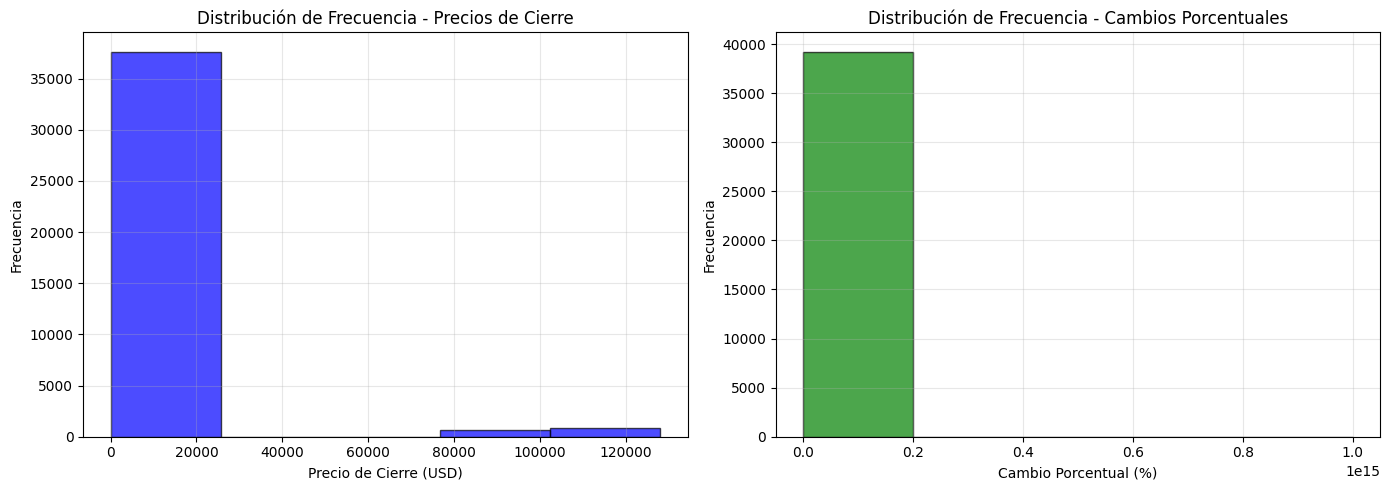

In [7]:
# Crear histograma de distribución de precios
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de precios de cierre
axes[0].hist(df['close'], bins=5, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Precio de Cierre (USD)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Frecuencia - Precios de Cierre')
axes[0].grid(True, alpha=0.3)

# Histograma de cambios porcentuales
axes[1].hist(df['pct_change'], bins=5, color='green', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Cambio Porcentual (%)')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución de Frecuencia - Cambios Porcentuales')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
## Top 500 Metadata

df_meta = pd.read_csv('/content/top_500_metadata.csv')
df.head()

,coin_id,symbol,timestamp,date,open,high,low,close,datetime,daily_range,daily_change,pct_change
0,bitcoin,btc,1.733530e+12,2024-12-07,97072.0,102034.0,96589.0,99974.0,2024-12-07,5445.0,2902.0,2.989534
1,bitcoin,btc,1.733875e+12,2024-12-11,99928.0,101235.0,94387.0,96650.0,2024-12-11,6848.0,-3278.0,-3.280362
2,bitcoin,btc,1.734221e+12,2024-12-15,96643.0,102658.0,95741.0,101367.0,2024-12-15,6917.0,4724.0,4.888093
3,bitcoin,btc,1.734566e+12,2024-12-19,101393.0,108135.0,100237.0,100356.0,2024-12-19,7898.0,-1037.0,-1.022753
4,bitcoin,btc,1.734912e+12,2024-12-23,100139.0,102759.0,92245.0,95094.0,2024-12-23,10514.0,-5045.0,-5.037997


In [9]:
# Limpieza de Datos

df_meta['market_cap'] = pd.to_numeric(df_meta['market_cap'], errors='coerce')
df_meta['current_price'] = pd.to_numeric(df_meta['current_price'], errors='coerce')
df_meta['price_change_percentage_24h'] = pd.to_numeric(df_meta['price_change_percentage_24h'], errors='coerce')
df_meta['total_volume'] = pd.to_numeric(df_meta['total_volume'], errors='coerce')
df_meta.head()

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://coin-images.coingecko.com/coins/images...,90034.00,1796670281875,1,1796670281875,3.439365e+10,91673.00,...,1.995901e+07,2.100000e+07,126080.00,-28.76949,2025-10-06T18:57:42.558Z,67.810000,1.323416e+05,2013-07-06T00:00:00.000Z,NaN,2025-12-07T23:33:52.059Z
1,ethereum,eth,Ethereum,https://coin-images.coingecko.com/coins/images...,3047.62,367795025205,2,367795025205,2.098058e+10,3145.89,...,1.206954e+08,NaN,4946.05,-38.61498,2025-08-24T19:21:03.333Z,0.432979,7.011197e+05,2015-10-20T00:00:00.000Z,"{'times': 44.269447818807166, 'currency': 'btc...",2025-12-07T23:33:44.339Z
2,tether,usdt,Tether,https://coin-images.coingecko.com/coins/images...,1.00,185668585289,3,191151709402,6.051337e+10,1.00,...,1.911141e+11,NaN,1.32,-24.40307,2018-07-24T00:00:00.000Z,0.572521,7.470440e+01,2015-03-02T00:00:00.000Z,NaN,2025-12-07T23:33:51.038Z
3,ripple,xrp,XRP,https://coin-images.coingecko.com/coins/images...,2.04,122855830675,4,203605167599,2.795817e+09,2.11,...,9.998575e+10,1.000000e+11,3.65,-44.26337,2025-07-18T03:40:53.808Z,0.002686,7.555941e+04,2014-05-22T00:00:00.000Z,NaN,2025-12-07T23:33:49.957Z
4,binancecoin,bnb,BNB,https://coin-images.coingecko.com/coins/images...,892.15,122843693665,5,122843693665,1.401530e+09,905.07,...,1.377359e+08,2.000000e+08,1369.99,-35.04920,2025-10-13T08:41:24.131Z,0.039818,2.234636e+06,2017-10-19T00:00:00.000Z,NaN,2025-12-07T23:33:51.812Z


In [10]:
# Filtro (Top *cantidad*)
top_data_n = 5
top_data = df_meta.nlargest(top_data_n, 'market_cap')
top_data
#len(top_data)

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://coin-images.coingecko.com/coins/images...,90034.00,1796670281875,1,1796670281875,3.439365e+10,91673.00,...,1.995901e+07,2.100000e+07,126080.00,-28.76949,2025-10-06T18:57:42.558Z,67.810000,1.323416e+05,2013-07-06T00:00:00.000Z,NaN,2025-12-07T23:33:52.059Z
1,ethereum,eth,Ethereum,https://coin-images.coingecko.com/coins/images...,3047.62,367795025205,2,367795025205,2.098058e+10,3145.89,...,1.206954e+08,NaN,4946.05,-38.61498,2025-08-24T19:21:03.333Z,0.432979,7.011197e+05,2015-10-20T00:00:00.000Z,"{'times': 44.269447818807166, 'currency': 'btc...",2025-12-07T23:33:44.339Z
2,tether,usdt,Tether,https://coin-images.coingecko.com/coins/images...,1.00,185668585289,3,191151709402,6.051337e+10,1.00,...,1.911141e+11,NaN,1.32,-24.40307,2018-07-24T00:00:00.000Z,0.572521,7.470440e+01,2015-03-02T00:00:00.000Z,NaN,2025-12-07T23:33:51.038Z
3,ripple,xrp,XRP,https://coin-images.coingecko.com/coins/images...,2.04,122855830675,4,203605167599,2.795817e+09,2.11,...,9.998575e+10,1.000000e+11,3.65,-44.26337,2025-07-18T03:40:53.808Z,0.002686,7.555941e+04,2014-05-22T00:00:00.000Z,NaN,2025-12-07T23:33:49.957Z
4,binancecoin,bnb,BNB,https://coin-images.coingecko.com/coins/images...,892.15,122843693665,5,122843693665,1.401530e+09,905.07,...,1.377359e+08,2.000000e+08,1369.99,-35.04920,2025-10-13T08:41:24.131Z,0.039818,2.234636e+06,2017-10-19T00:00:00.000Z,NaN,2025-12-07T23:33:51.812Z


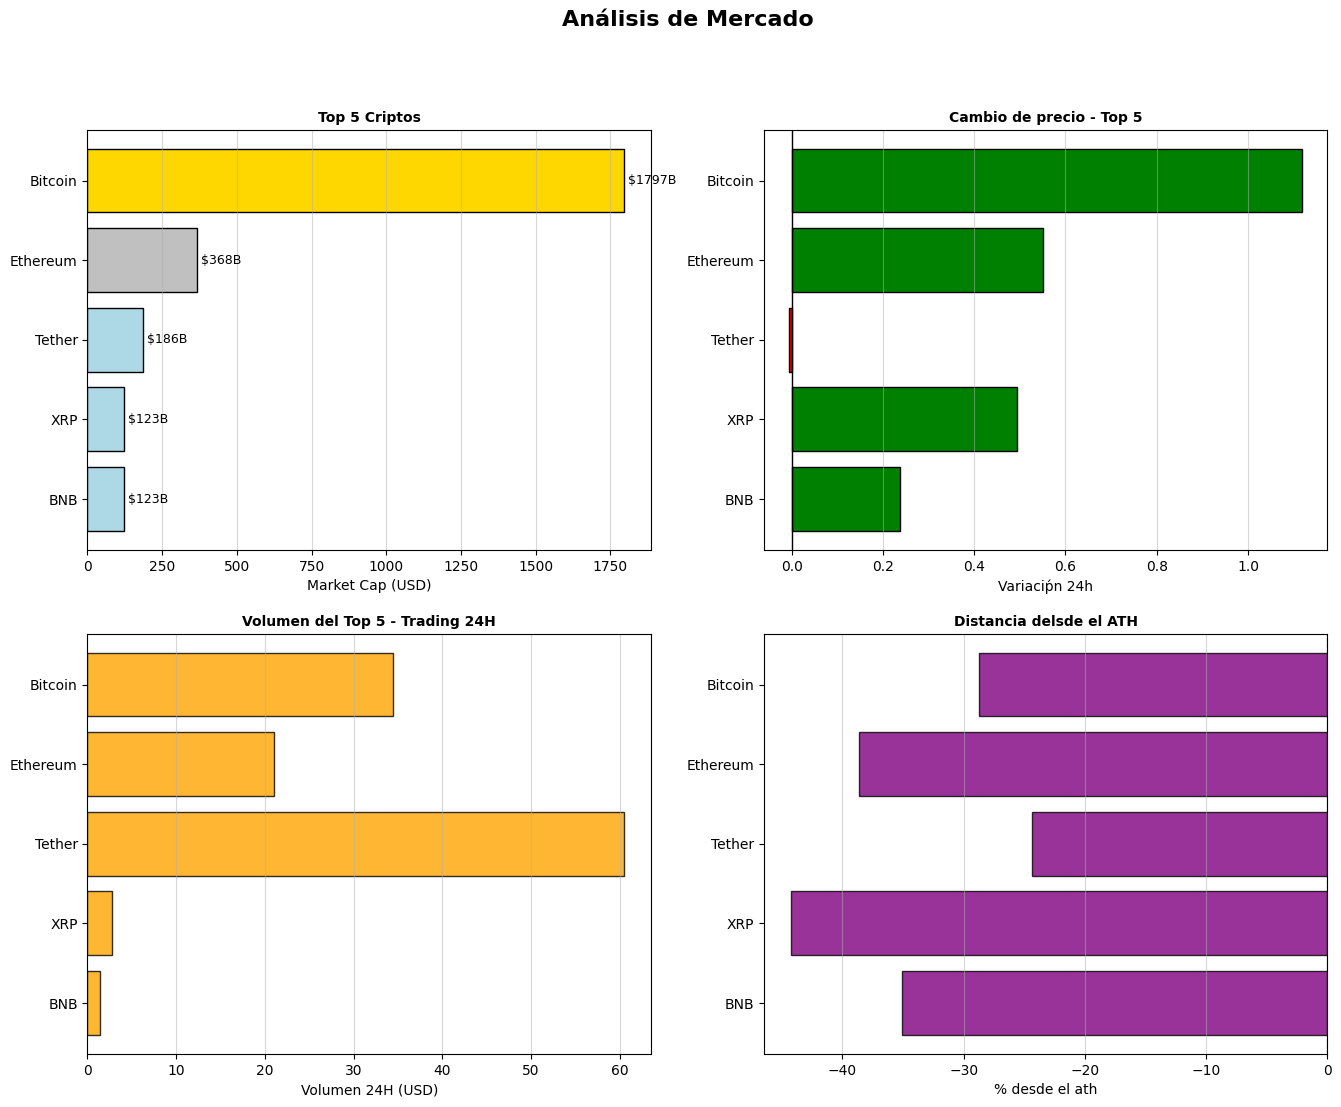

In [11]:
# V: Top x Market cap
fig, axes = plt.subplots(2, 2, figsize=(16,12))
fig.suptitle('Análisis de Mercado', fontsize = 16, fontweight = 'bold')

# plot1: mc
colors_cap = ['gold' if x == 'Bitcoin' else 'silver' if x == 'Ethereum' else 'lightblue'
              for x in top_data['name']]

axes[0,0].barh(top_data['name'], top_data['market_cap']/1e9, color = colors_cap, edgecolor = 'black')
axes[0,0].set_xlabel('Market Cap (USD)', fontsize=10)
axes[0,0].set_title(f'Top {len(top_data)} Criptos', fontsize=10, fontweight='bold')
axes[0,0].invert_yaxis()
axes[0,0].grid(axis='x', alpha=0.5)

# Costos en las barras
for i, (indx, row) in enumerate(top_data.iterrows()):
  axes[0,0].text(row['market_cap']/1e9, i, f" ${row['market_cap']/1e9:.0f}B",
       va='center', fontsize=9)


# plot2: precio variación x 24h
colors_change = ['green' if x > 0 else 'red' for x in top_data['price_change_percentage_24h']]
axes[0,1].barh(top_data['name'], top_data['price_change_percentage_24h'],
               color=colors_change, edgecolor='black')
axes[0,1].axvline(x=0, color='black', linestyle='-', linewidth=1)
axes[0,1].set_xlabel('Variaciṕn 24h', fontsize=10)
axes[0,1].set_title(f"Cambio de precio - Top {len(top_data)}", fontsize=10, fontweight='bold')
axes[0,1].invert_yaxis()
axes[0,1].grid(axis='x', alpha=0.5)

# plot3: volumen
axes[1,0].barh(top_data['name'], top_data['total_volume']/1e9,
                        color='orange', alpha=0.8, edgecolor='black')
axes[1,0].set_xlabel('Volumen 24H (USD)', fontsize=10)
axes[1,0].set_title(f'Volumen del Top {len(top_data)} - Trading 24H', fontsize=10, fontweight='bold')
axes[1,0].invert_yaxis()
axes[1,0].grid(axis='x', alpha=0.5)

# plot4: ath
axes[1,1].barh(top_data['name'], top_data['ath_change_percentage'],
               color='purple', alpha=0.8, edgecolor='black')
axes[1,1].set_xlabel("% desde el ath", fontsize = 10)
axes[1,1].set_title('Distancia delsde el ATH', fontsize=10, fontweight='bold')
axes[1,1].invert_yaxis()
axes[1,1].grid(axis='x', alpha=0.5)
axes[1,1].axvline(x=0, color='black', linestyle='--', linewidth=0.8)

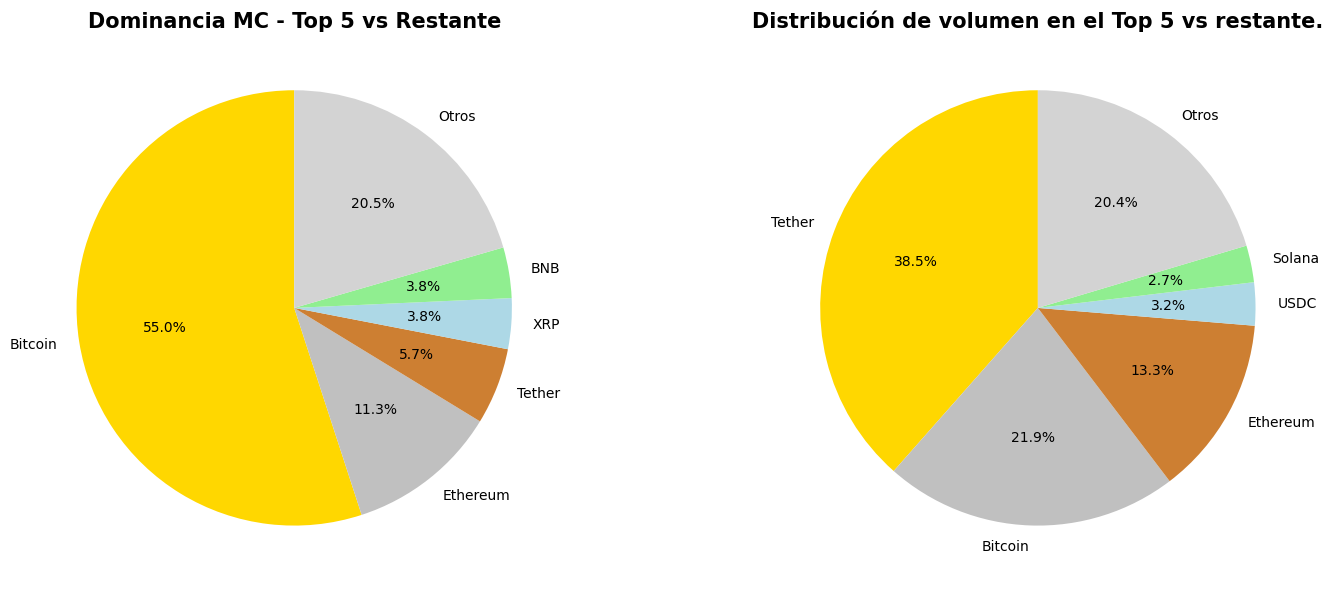

In [12]:
# Dominancia
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# MC
top_n = 5# *cantidad de registros*
top_data_cap = df_meta.nlargest(top_n, 'market_cap')
others_cap = df_meta.iloc[top_n:]['market_cap'].sum()
cap_data = list(top_data_cap['market_cap']) + [others_cap]
cap_labels = list(top_data_cap['name']) + ['Otros']
colors_pie = ['gold', 'silver', '#CD7F32', 'lightblue', 'lightgreen', 'lightgray']

axes[0].pie(cap_data, labels=cap_labels, colors=colors_pie, startangle = 90, autopct='%1.1f%%')
axes[0].set_title(f'Dominancia MC - Top {top_n} vs Restante', fontsize = 15, fontweight = 'bold')

# Vol trading
top_data_vol = df_meta.nlargest(top_n, 'total_volume')
others_vol = df_meta.iloc[top_n:]['total_volume'].sum()
# Corrected: Convert Series to list of values before appending others_vol
vol_data = list(top_data_vol['total_volume'].values) + [others_vol]
vol_labels = list(top_data_vol['name']) + ['Otros']

axes[1].pie(vol_data, labels=vol_labels, colors=colors_pie, startangle=90, autopct='%1.1f%%')

axes[1].set_title(f'Distribución de volumen en el Top {top_n} vs restante.', fontsize = 15, fontweight='bold')

plt.tight_layout()
plt.show()

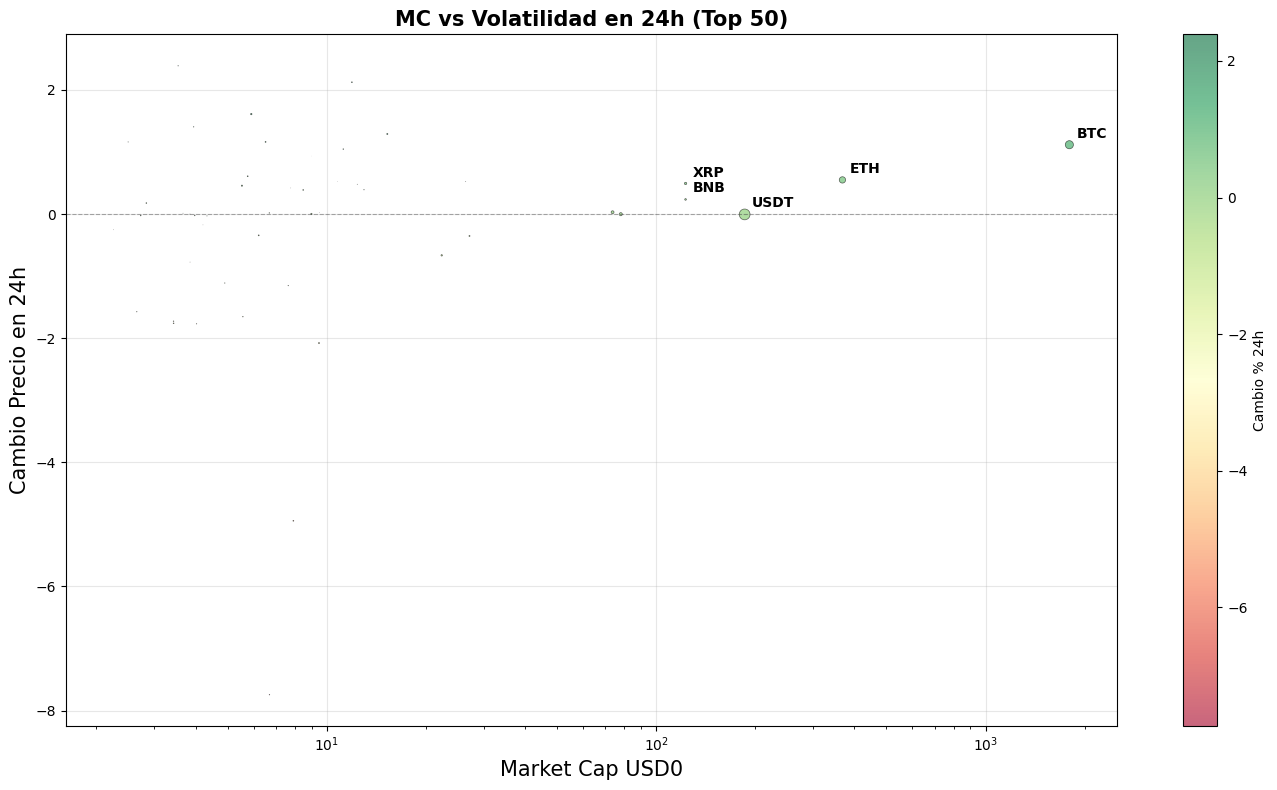

In [13]:
# MC vs volat

fig, ax = plt.subplots(figsize=(14,8))

top_g3 = 50
top_visual3 = df_meta.nlargest(top_g3, 'market_cap')
top_visual3

#Scatter
scatter = ax.scatter(top_visual3['market_cap']/1e9,
                     top_visual3['price_change_percentage_24h'],
                     s=top_visual3['total_volume']/1e9,
                     c=top_visual3['price_change_percentage_24h'],
                     cmap='RdYlGn',
                     alpha=0.6,
                     edgecolors='black',
                     linewidths=0.5)

for idxn, row in top_data_cap.head(5).iterrows():
  ax.annotate(row['symbol'].upper(),
              (row['market_cap']/1e9, row['price_change_percentage_24h']),
              fontsize=10, fontweight='bold',
              xytext=(5,5), textcoords='offset points')

ax.set_xlabel('Market Cap USD0', fontsize=15)
ax.set_ylabel('Cambio Precio en 24h', fontsize=15)
ax.set_title(f'MC vs Volatilidad en 24h (Top {top_g3})',
             fontsize=15, fontweight='bold') # burbuja = volumen de trading
ax.axhline(y=0, color='black', linestyle='--', linewidth=0.8, alpha=0.3)
ax.grid(True, alpha=0.3)
ax.set_xscale('log') #Mejora un poco la visualizacion

plt.colorbar(scatter, ax=ax, label='Cambio % 24h')
plt.tight_layout()
plt.show()

In [14]:
print(f"-- Estadisticas Mercado Cripto ---")
print(f'\nTotal de criptomonedas analizadas: {len(df_meta)}')
print(f'Market Cap Total: ${df_meta["market_cap"].sum()/1e12:.2f} Trillones')
print(f'Volumen Total 24h: ${df_meta["total_volume"].sum()/1e9:.2f} Miles de Millones')
print(f'\nDominancia de Bitcoin: {(top_data.iloc[0]["market_cap"]/df_meta["market_cap"].sum())*100:.2f}%')
print(f'Dominancia Top 10: {(top_data["market_cap"].sum()/df_meta["market_cap"].sum())*100:.2f}%')
print(f'\nCambio promedio 24h: {df_meta["price_change_percentage_24h"].mean():.2f}%')
print(f'Tokens en positivo 24h: {(df_meta["price_change_percentage_24h"] > 0).sum()}')
print(f'Tokens en negativo 24h: {(df_meta["price_change_percentage_24h"] < 0).sum()}')

-- Estadisticas Mercado Cripto ---

Total de criptomonedas analizadas: 500
Market Cap Total: $3.27 Trillones
Volumen Total 24h: $152.14 Miles de Millones

Dominancia de Bitcoin: 55.01%
Dominancia Top 10: 79.48%

Cambio promedio 24h: -0.78%
Tokens en positivo 24h: 195
Tokens en negativo 24h: 284
